**1. Objective:**
   - The primary objective of this analysis is to gain deep insights into the factors that influence user engagement with social media posts across various platforms.

**Outcome Variables:**
- **Impressions**: Impressions serve as a key social media metric that quantifies how often a piece of content, whether it's a post, tweet, or advertisement, has been viewed by users. It provides insights into the extent of content visibility.
- **Likes**: This metric indicates that a user not only viewed a post but also took an additional action to engage with it. While it's worth noting that different forms of likes, such as "Haha reactions," may require distinct actions and represent higher levels of engagement, our analysis will primarily focus on standard "Likes" for simplicity and consistency across all media platforms.
- **Comments**: Comments represent the highest level of user engagement with social media content. Users invest the most effort in leaving comments, making this metric a valuable indicator of active interaction. Our analysis concentrates on the number of comments, considering the lack of detailed content information within each comment for further analysis.
- **Engagement Rate (per Impression)**: This composite metric integrates all forms of user engagement—likes, comments, and potentially other interactions—relative to the number of impressions. It offers a comprehensive score that reflects the overall engagement with content, accounting for variations in content reach.
- **Outcome Variables:**
- **Shares**: Shares quantify the number of times users have redistributed a piece of content to their own network. This metric signifies a proactive endorsement of the content, as users choose to amplify its reach by sharing it with their followers or connections. Analyzing shares provides insights into the virality and audience-driven distribution of content across social media platforms.


**2. Data Features:**
- To achieve this, we will leverage a set of data features extracted from the content of social media posts, which include:
  - **Number of Words**: Quantifying post length.
  - **Number of Characters**: Assessing content complexity.
  - **Number of Emojis**: Identifying the use of visual elements.
  - **Hashtags**: Exploring the presence of hashtags.
  - **Number of Hashtags**: Analyzing hashtag count.
  - **Is Link Present**: Detecting the inclusion of links.
  - **CountVectorized Text**: Converting text data into a numerical format.

**3. Preprocessing Text Data via NLP:**
- To prepare the text data for analysis, we will follow a structured NLP-based approach:

   - Select and standardize text data, ensuring uniform lowercase representation.
   - Split the text into two dataframes: content and hashtags.
   - Tokenize the text data for further analysis.
   - Remove stop words and apply lemmatization to reduce complexity while preserving content significance.
   - Utilize TF-IDF Vectorizer for content analysis, considering the importance of words in distinguishing posts.

**Why are we only removing stop words and lemmatizing the content dataframe?**
- In our data analysis, it's crucial to tailor our text preprocessing to the nature of the data. Here's why we specifically focus on removing stop words and lemmatizing the content, but not the hashtags:

   - **Contextual Relevance**: Understanding the context of text data is essential. In our case, we're dealing with relatively extensive documents, encompassing over 100 posts in this analysis. These posts contain numerous tokens and a wide array of words. To maintain a manageable and interpretable dataset, it's necessary to reduce complexity and dimensionality, ensuring that our analysis remains focused on the most contextually relevant information. This is particularly crucial for the post content itself, which is often more expansive and diverse.

   - **The Role of Stop Words**: Stop words are common words such as "the," "and," "is," which frequently occur in text but contribute less to the overall meaning. By removing stop words from the content, we enhance the quality of our analysis by excluding words tht, in this context, may not hold significant meaning. This practice allows us to focus on content-specific words that carry more weight in our analysis.

   - **Hashtags Distinctiveness**: In contrast, hashtags represent a distinct aspect of social media posts. They serve as categorical markers and are substantially fewer in number compared to the words found in the content of posts. Moreover, the difference between different hashtags, even slight variations like #finance and #finances, can be highly meaningful when comparing how they resonate with diverse audiences. Therefore, it's beneficial to retain and analyze hashtags separately to capture this nuance and extract insights that may be hidden in the diversity of hashtag usage.

**Why are we using TF-IDF Vectorizer instead of Count Vectorizer?**
- In our content-centric analysis of social media posts, where the primary goal is to uncover the influence of specific content topics, hashtags, emojis, and other content-related factors on post engagement, we opt for TF-IDF Vectorizer for the following reasons:

   - **Importance of Word Significance**: TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is well-suited for this analysis as it takes into account the importance of words in distinguishing posts. Unlike Count Vectorizer, which merely counts the occurrences of words, TF-IDF assigns a weight to each word based on its frequency in a post and across the dataset. This means that words with higher TF-IDF scores are deemed more significant in differentiating posts. This is especially valuable in understanding the distinct topics and content elements that impact post engagement.

   - **Topic Analysis**: We aim to explore and identify specific content topics and elements that drive engagement. TF-IDF allows us to identify words and phrases that are not only frequent but also distinctive in differentiating posts. This makes it an ideal choice for topic analysis, enabling us to pinpoint influential content components that may not be apparent when using simple word counts.



# Analysis Plan

**Content Centric Social Media Post Analysis**

**1. Data Preparation:**
   - Ensure data cleanliness and consistency, including handling missing values.
   - Normalize data types and structure for analysis.

**2. Content Exploration:**
   - Dive into the content of social media posts to understand the factors influencing engagement.

**3. Feature Engineering:**
   - Create and explore additional content-related features, including sentiment analysis, post length, content complexity, and other content-related metrics that might impact engagement.

**4. Content Topics Analysis:**
   - Investigate the influence of specific content topics on engagement:
     - Employ machine learning models to analyze the impact of content topics on engagement metrics.
     - Utilize the TF-IDF Vectorizer on content text as independent variables.
     - Extract feature importance to identify significant content topics.

**5. Hashtags Analysis:**
   - Determine the impact of hashtags on engagement:
     - Utilize machine learning models to analyze the effect of hashtags on engagement metrics.
     - Apply the TF-IDF Vectorizer on content text as independent variables.
     - Extract feature importance to identify influential hashtags.

**6. Emojis and Special Characters:**
   - Examine the role of emojis and special characters in engagement:

By focusing on content-centric analysis, we can uncover valuable insights related to content topics, hashtags, emojis, and other content-related factors that influence social media post engagement. This approach allows you to provide actionable recommendations for content optimization.

In [1]:
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import spacy
import re
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#loading the processed merged dataset from the EDA
merged_data_clean = pd.read_csv("merged_data_clean.csv")
merged_data_clean.head(3)

,index,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,...,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Media Views,Saves,Hour
0,0,Twitter,Text,,Welcome @VusiThembekwayo to the session. Tell ...,2510,0.0,0.0,0.0,0.0,...,0.0,4.0,24.0,7.0,1.0,1.0,0.0,0.0,0.0,04 PM
1,1,Twitter,Text,,Our guest today is @VusiThembekwayo the younge...,789,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,04 PM
2,2,Twitter,Text,,Welcome everyone to another #MovingForwardNG s...,791,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,04 PM


In [4]:
merged_data_clean.dtypes

index                                 int64
Network                              object
Content Type                         object
Sent by                              object
Post                                 object
Impressions                           int64
Organic Impressions                 float64
Viral Impressions                   float64
Non-viral Impressions               float64
Fan Impressions                     float64
Non-fan Impressions                 float64
Reach                               float64
Organic Reach                       float64
Viral Reach                         float64
Non-viral Reach                     float64
Fan Reach                           float64
Engagement Rate (per Impression)    float64
Engagement Rate (per Reach)         float64
Engagements                           int64
Reactions                             int64
Likes                                 int64
Love Reactions                      float64
Haha Reactions                  

In [5]:
#check summary statistics for the selected outcome variables
# Set the outcome columns
outcome_cols = ['Impressions', 'Likes', 'Comments', 'Engagement Rate (per Impression)']

# Group the data by the 'Network' column and calculate summary statistics for each group
summary_statistics = merged_data_clean.groupby('Network')[outcome_cols].describe()

# Print the summary statistics
summary_statistics


Impressions                                                  \
                count         mean          std   min     25%     50%   
Network                                                                 
Facebook       7576.0  6766.170803  7422.045715  13.0  2973.0  4689.0   
Instagram      6691.0  2376.595128  1828.358386   0.0  1372.0  2032.0   
LinkedIn       6235.0  1083.983801  1287.691576   1.0   488.0   785.0   
Twitter        7772.0  3214.941714  3337.435478   0.0  1308.0  2461.5   

                               Likes             ... Comments          \
               75%       max   count       mean  ...      75%     max   
Network                                          ...                    
Facebook   8234.25  207378.0  7576.0  68.399419  ...     19.0  1050.0   
Instagram  2851.50   39681.0  6691.0  66.105067  ...     10.0  1033.0   
LinkedIn   1243.00   27949.0  6235.0  15.611548  ...      1.0   284.0   
Twitter    3823.50   77765.0  7772.0  18.649897  ...      6.0   623.0   

          Engagement Rate (per Impression)                                     \
                                     count      mean       std  min  25%  50%   
Network                                                                         
Facebook                            7576.0  3.253590  3.543961  0.2  1.8  2.6   
Instagram                           6691.0  3.366462  4.326195  0.0  2.2  2.8   
LinkedIn                            6235.0  3.726528  6.378157  0.0  1.9  2.7   
Twitter                             7772.0  2.900618  2.579543  0.0  1.7  2.4   

                       
           75%    max  
Network                
Facebook   3.7   86.1  
Instagram  3.6   87.1  
LinkedIn   3.7  100.0  
Twitter    3.4   66.4  

[4 rows x 32 columns]

Summary of Summary Statistics for Social Media Post Outcomes by Network:

**Impressions:**
- Facebook posts have the highest average impressions (mean: 6,766) among all networks, with a wide distribution (std: 7,422).
- Instagram and Twitter follow with average impressions of 2,376 and 3,214, respectively.
- LinkedIn posts have the lowest average impressions (mean: 1,084).

**Likes:**
- Facebook and Instagram posts have a similar average number of likes, with Facebook having a slightly higher mean (68.4) compared to Instagram (66.1).
- LinkedIn posts have a significantly lower average likes count (mean: 15.6).
- Twitter posts have an average likes count between Facebook and LinkedIn (mean: 18.6).

**Comments:**
- Facebook posts receive the highest average comments (mean: 26.2), followed by Instagram (mean: 12.2), and Twitter (mean: 8.4).
- LinkedIn posts have the lowest average comments count (mean: 2.2), indicating fewer interactions through comments.

**Engagement Rate (per Impression):**
- LinkedIn posts have the highest average engagement rate (mean: 3.73), with a wide range of engagement rates.
- Instagram and Facebook posts have similar average engagement rates (mean: 3.37 and 3.25, respectively).
- Twitter posts have a slightly lower average engagement rate (mean: 2.90).

These summary statistics provide valuable insights into the performance of social media posts across different networks. Facebook appears to have the highest average impressions and likes, while LinkedIn has the highest engagement rate. Instagram and Twitter fall in between, with Instagram showing strong engagement in terms of likes and comments. These statistics can guide content strategies and decision-making for each social media network.

In [6]:
#checking for zero values in the outcome cols
for col in outcome_cols:
    num_null = merged_data_clean[col].isin([0]).sum()
    print(f'{col}: {num_null} zeroes present')

Impressions: 29 zeroes present
Likes: 499 zeroes present
Comments: 8558 zeroes present
Engagement Rate (per Impression): 73 zeroes present


In [7]:
#having zero impressions on  post is strange so we'll review them
merged_data_clean[merged_data_clean['Impressions'] == 0]

,index,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,...,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,Follows from Post,Unfollows from Post,Media Views,Saves,Hour
6293,7637,Instagram,Photo,Aramide Salami,#TriviaThursday: Let’s have a little fun shall...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10 AM
6480,7870,Instagram,Video,,It was quite a great turnout as residents of T...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,05 PM
6482,7872,Instagram,Photo,,#HappenToLife with Voluntary Contributions (VC...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12 PM
6747,8187,Instagram,Photo,Aramide Salami,"With consistency and focus, the early mornings...",0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 AM
6795,8244,Instagram,Photo,Aramide Salami,"FEAR can power you up or do otherwise, but eve...",0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11 AM
8382,9907,Instagram,Photo,,👋 if you ever used this.\n#ThrowbackThursday #TBT,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,05 PM
11446,12971,Instagram,Photo,Aramide Salami,Let’s help you get the right assessment in tun...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,01 PM
12260,13785,Instagram,Carousel,,Stanbic IBTC Bank rebuts the Ascon Oil story. ...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12 PM
12384,13909,Instagram,Photo,,"When you save money or invest it, there are tw...",0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12 PM
13703,15228,Instagram,Photo,,We provide useful information regarding busine...,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10 AM


Seems like these posts do not have metrics for any of the other variables either so we'll drop them

In [8]:
# Filter out rows with zero impressions
merged_data_clean = merged_data_clean[merged_data_clean['Impressions'] > 0]

In [9]:
#seperate links from posts
# Define an expression pattern to match regular URLs and shortened ones
url_pattern = r'https?://\S+|www\.\S+|bit\.ly/\S+'

# Extract URLs from the 'Post' column
def extract_links(text):
    links = re.findall(url_pattern, text)
    if not links:
        return None
    return ', '.join(links)

merged_data_clean['links'] = merged_data_clean['Post'].apply(extract_links)

# Print the DataFrame with extracted links
merged_data_clean['links']

0                            None
1                            None
2                            None
3                            None
4                            None
                   ...           
28269                        None
28270    https://lnkd.in/dASbfHCz
28271                        None
28272     https://t.co/lwNxLg911o
28273                        None
Name: links, Length: 28245, dtype: object

In [10]:
merged_data_clean['links'].value_counts()

links
www.linktr.ee/StanbicIBTC                           394
www.stanbicibtcbank.com                              89
www.stanbicibtcpension.com                           72
https://lnkd.in/d2xJG9C                              67
https://linktr.ee/StanbicIBTC                        66
                                                   ... 
https://t.co/rRel42jMxz, https://t.co/tARgIKKI2d      1
https://t.co/nqLLV3x9yr                               1
https://t.co/q0RvN5Ahjy                               1
https://t.co/eXM7FSD4G1                               1
https://t.co/lwNxLg911o                               1
Name: count, Length: 8333, dtype: int64

In [11]:
#creating a copy of the posts for analysis
merged_data_clean['raw_text'] = merged_data_clean['Post']

In [12]:
# number of words
merged_data_clean['word_count'] = merged_data_clean['raw_text'].apply(lambda x: len(x.split()))

In [13]:
# number of characters
merged_data_clean['char_count'] = merged_data_clean['raw_text'].apply(lambda x: len(x))

In [14]:
# number of emojis
emojis_list = list(emoji.UNICODE_EMOJI['en'].keys())
merged_data_clean['emoji_count'] = merged_data_clean['raw_text'].apply(
    lambda x: len(
        set(emoji.UNICODE_EMOJI['en'].keys()) & set(list(x))
    )
)

In [15]:
# number of hashtags
merged_data_clean['hashtag_count'] = merged_data_clean['raw_text'].str.count('#')

In [16]:
# Define a regular expression pattern to match URLs, including common URL shorteners
url_pattern = r'https?://\S+|www\.\S+|bit\.ly/\S+|t\.co/\S+'

# Find all URLs in the text
merged_data_clean['link_bool'] = merged_data_clean['raw_text'].str.contains(url_pattern, flags=re.IGNORECASE, regex=True)

In [17]:
merged_data_clean.head(3)

,index,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,...,Media Views,Saves,Hour,links,raw_text,word_count,char_count,emoji_count,hashtag_count,link_bool
0,0,Twitter,Text,,Welcome @VusiThembekwayo to the session. Tell ...,2510,0.0,0.0,0.0,0.0,...,0.0,0.0,04 PM,None,Welcome @VusiThembekwayo to the session. Tell ...,14,108,0,1,False
1,1,Twitter,Text,,Our guest today is @VusiThembekwayo the younge...,789,0.0,0.0,0.0,0.0,...,0.0,0.0,04 PM,None,Our guest today is @VusiThembekwayo the younge...,16,111,0,1,False
2,2,Twitter,Text,,Welcome everyone to another #MovingForwardNG s...,791,0.0,0.0,0.0,0.0,...,0.0,0.0,04 PM,None,Welcome everyone to another #MovingForwardNG s...,8,74,0,1,False


In [18]:
merged_data_clean.dtypes

index             int64
Network          object
Content Type     object
Sent by          object
Post             object
                  ...  
word_count        int64
char_count        int64
emoji_count       int64
hashtag_count     int64
link_bool          bool
Length: 66, dtype: object

In [19]:
# Extract hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    if not hashtags:
        return None
    return ', '.join(hashtags)

merged_data_clean['extracted_hashtags'] = merged_data_clean['raw_text'].apply(extract_hashtags)
merged_data_clean.head(3)

,index,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,...,Saves,Hour,links,raw_text,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags
0,0,Twitter,Text,,Welcome @VusiThembekwayo to the session. Tell ...,2510,0.0,0.0,0.0,0.0,...,0.0,04 PM,None,Welcome @VusiThembekwayo to the session. Tell ...,14,108,0,1,False,#MovingForwardNG
1,1,Twitter,Text,,Our guest today is @VusiThembekwayo the younge...,789,0.0,0.0,0.0,0.0,...,0.0,04 PM,None,Our guest today is @VusiThembekwayo the younge...,16,111,0,1,False,#MovingForwardNG
2,2,Twitter,Text,,Welcome everyone to another #MovingForwardNG s...,791,0.0,0.0,0.0,0.0,...,0.0,04 PM,None,Welcome everyone to another #MovingForwardNG s...,8,74,0,1,False,#MovingForwardNG


In [20]:
#view hashtag usage 
merged_data_clean['extracted_hashtags'].value_counts()

extracted_hashtags
#ITCANBE                                   5775
#WealthWednesday                            711
#ItCanBe                                    506
#Reward4Saving, #ITCANBE                    305
#BestInsuranceDeals                         281
                                           ... 
#BlackFriday, #TopReads                       1
#EidAlAdha, #EidMubarak, #Eid, #ItCanBe       1
#WAPIS                                        1
#ItCanBe, #Insurance                          1
#SMWAgritechNG, #SMWLagos                     1
Name: count, Length: 2580, dtype: int64

In [21]:
#review the data features 
data_features = merged_data_clean[['Network','raw_text', 'word_count', 'char_count',
                                   'emoji_count', 'hashtag_count', 'link_bool', 'extracted_hashtags', 'links']]
data_features.head(3)

,Network,raw_text,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,links
0,Twitter,Welcome @VusiThembekwayo to the session. Tell ...,14,108,0,1,False,#MovingForwardNG,None
1,Twitter,Our guest today is @VusiThembekwayo the younge...,16,111,0,1,False,#MovingForwardNG,None
2,Twitter,Welcome everyone to another #MovingForwardNG s...,8,74,0,1,False,#MovingForwardNG,None


**Standardize the text data**

In [22]:
#function to remove links from the posts so we can standardize the text content only
def remove_links(text):
    # Define a regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+|bit\.ly/\S+'
    
    # Remove URLs from the text
    text_without_links = re.sub(url_pattern, '', text)
    
    return text_without_links

#standardize the posts data
def standardize_text(text):
    # Convert text to lowercase, remove contractions (e.g., "'s"), symbols (except #), and extra whitespace
    text = text.lower()
    text = re.sub(r"\'s", "", text)
    text = re.sub(r'[^\w\s#]', '', text)
    text = ' '.join(text.split())
    
    return text


In [23]:
# Remove links from 'raw_text'
merged_data_clean['raw_text'] = merged_data_clean['raw_text'].apply(remove_links)
print('Raw text:', '\n', merged_data_clean['raw_text'][0], '\n')

# Standardize the 'raw_text'
merged_data_clean['raw_text'] = merged_data_clean['raw_text'].apply(standardize_text)
print('Standardized text:', '\n', merged_data_clean['raw_text'][0], '\n')

Raw text: 
 Welcome @VusiThembekwayo to the session. Tell us about your most successful business story. #MovingForwardNG 

Standardized text: 
 welcome vusithembekwayo to the session tell us about your most successful business story #movingforwardng 



#### Since the performance of the hashtags will be reviewed seperately we'll remove them from the raw text

In [24]:
# Define a regular expression pattern to match hashtags
hashtag_pattern = r'#\w+'

# Remove hashtags from the 'raw_text' column
merged_data_clean['raw_text'] = merged_data_clean['raw_text'].str.replace(hashtag_pattern, '', regex=True)

# Print an example with hashtags removed
print('Standardized text:', '\n', merged_data_clean['raw_text'][0], '\n')

Standardized text: 
 welcome vusithembekwayo to the session tell us about your most successful business story  



# Data preparation NLP

In [25]:
# loading nlp model
nlp = spacy.load('en_core_web_sm')

In [26]:
# Print before tokenization
print('Before tokenization:', '\n', merged_data_clean['raw_text'][0], '\n')

# Tokenize the 'raw_text' column
merged_data_clean['tokenized_text'] = merged_data_clean['raw_text'].apply(lambda text: [token.text for token in nlp(text)])

# Print after tokenization
print('After tokenization:', '\n', merged_data_clean['tokenized_text'][0], '\n')


Before tokenization: 
 welcome vusithembekwayo to the session tell us about your most successful business story  

After tokenization: 
 ['welcome', 'vusithembekwayo', 'to', 'the', 'session', 'tell', 'us', 'about', 'your', 'most', 'successful', 'business', 'story'] 



In [27]:
# Define a function to lemmatize and remove stop words
def lemmatize_and_remove_stopwords(text):
    doc = nlp(text)
    cleaned_text = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(cleaned_text)

In [28]:
# Print before applying the function
print('Before Cleaning:', '\n', merged_data_clean['raw_text'][0], '\n')

# Apply the function to each row in the 'raw_text' column
merged_data_clean['cleaned_text'] = merged_data_clean['raw_text'].apply(lemmatize_and_remove_stopwords)

# Print after applying the function
print('After Cleaning:', '\n', merged_data_clean['cleaned_text'][0], '\n')

Before Cleaning: 
 welcome vusithembekwayo to the session tell us about your most successful business story  

After Cleaning: 
 welcome vusithembekwayo session tell successful business story 



In [29]:
merged_data_clean.head(3)

,index,Network,Content Type,Sent by,Post,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Fan Impressions,...,links,raw_text,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,tokenized_text,cleaned_text
0,0,Twitter,Text,,Welcome @VusiThembekwayo to the session. Tell ...,2510,0.0,0.0,0.0,0.0,...,None,welcome vusithembekwayo to the session tell us...,14,108,0,1,False,#MovingForwardNG,"[welcome, vusithembekwayo, to, the, session, t...",welcome vusithembekwayo session tell successfu...
1,1,Twitter,Text,,Our guest today is @VusiThembekwayo the younge...,789,0.0,0.0,0.0,0.0,...,None,our guest today is vusithembekwayo the younges...,16,111,0,1,False,#MovingForwardNG,"[our, guest, today, is, vusithembekwayo, the, ...",guest today vusithembekwayo young director lis...
2,2,Twitter,Text,,Welcome everyone to another #MovingForwardNG s...,791,0.0,0.0,0.0,0.0,...,None,welcome everyone to another session with vusi...,8,74,0,1,False,#MovingForwardNG,"[welcome, everyone, to, another, , session, w...",welcome session vusithembekwayo


In [30]:
# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(merged_data_clean['cleaned_text'])

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array
dense_array = X.toarray()

# Create a DataFrame with the feature names
text_data_vectorized = pd.DataFrame(dense_array, columns=feature_names)
text_data_vectorized 

,00,000,0000,000000,00010,0003,0004,0006,003,004,...,zshamsuna,zucchini,zuckerberg,zumba,zweli,ńdán,𝔸𝕣𝕖,𝔹𝕝𝕦𝕖,𝔾𝕠𝕚𝕟𝕘,𝕎𝕖
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TF-IDF vectorization often results in a sparse matrix because most words in a document do not occur frequently, leading to many zero values in the matrix.The dense array is obtained by converting this sparse matrix into an array where all elements are explicitly represented. While sparse matrices are memory-efficient, some operations or libraries may not directly support sparse formats, and converting to a dense array makes the data compatible with a broader range of tools and algorithms

In [31]:
# creating final data frame for word details in posts
post_details = merged_data_clean[['Network', 'raw_text', 'tokenized_text', 'cleaned_text']]
post_details_final = pd.concat([post_details, text_data_vectorized], axis=1)
post_details_final.head(3)

,Network,raw_text,tokenized_text,cleaned_text,00,000,0000,000000,00010,0003,...,zshamsuna,zucchini,zuckerberg,zumba,zweli,ńdán,𝔸𝕣𝕖,𝔹𝕝𝕦𝕖,𝔾𝕠𝕚𝕟𝕘,𝕎𝕖
0,Twitter,welcome vusithembekwayo to the session tell us...,"[welcome, vusithembekwayo, to, the, session, t...",welcome vusithembekwayo session tell successfu...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Twitter,our guest today is vusithembekwayo the younges...,"[our, guest, today, is, vusithembekwayo, the, ...",guest today vusithembekwayo young director lis...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Twitter,welcome everyone to another session with vusi...,"[welcome, everyone, to, another, , session, w...",welcome session vusithembekwayo,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#creating final data frame for post content
post_content_final = merged_data_clean[['Network','Date', 'Hour','Post', 'raw_text','Content Type', 'word_count', 'char_count', 'emoji_count',
                                   'hashtag_count', 'link_bool', 'extracted_hashtags','Impressions', 'Likes',
                                  'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']]
post_content_final.head(3)

,Network,Date,Hour,Post,raw_text,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,Twitter,2014-10-09,04 PM,Welcome @VusiThembekwayo to the session. Tell ...,welcome vusithembekwayo to the session tell us...,Text,14,108,0,1,False,#MovingForwardNG,2510,0,0,0.0,36,1.4
1,Twitter,2014-10-09,04 PM,Our guest today is @VusiThembekwayo the younge...,our guest today is vusithembekwayo the younges...,Text,16,111,0,1,False,#MovingForwardNG,789,0,0,0.0,7,0.9
2,Twitter,2014-10-09,04 PM,Welcome everyone to another #MovingForwardNG s...,welcome everyone to another session with vusi...,Text,8,74,0,1,False,#MovingForwardNG,791,0,0,0.0,2,0.3


In [33]:
# Filter out rows with no hashtags
hashtags_data = merged_data_clean[merged_data_clean['extracted_hashtags'].notnull()]

# Vectorize hashtags
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(hashtags_data['extracted_hashtags'])

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a dense array
dense_array = X.toarray()

# Create a DataFrame with the feature names
hashtags_vectorized = pd.DataFrame(dense_array, columns=feature_names)

# Concatenate the vectorized hashtags with the original data
hashtags_final = pd.concat([hashtags_data['Network'],hashtags_data['Engagement Rate (per Impression)'],
                            hashtags_data['extracted_hashtags'], hashtags_vectorized], axis=1)
hashtags_final.head(3)


,Network,Engagement Rate (per Impression),extracted_hashtags,10over10,10reward4saving,10yearchallenge,17,2019,2021,2022edition,...,yls2023,youare,youarebeautiful,youaresecured,youarestrong,youcan,youthevent,zerohunger,zeromalariastartswithme,zeromalariastartswithus
0,Twitter,1.4,#MovingForwardNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Twitter,0.9,#MovingForwardNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Twitter,0.3,#MovingForwardNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have three final datasets for conducting the analysis
- post_details_final: This dataset encompasses the linguistic details within the posts.

- post_content_final: This dataset provides insights into the overall content of the posts, including various metrics.

- hashtags_final: Focusing specifically on the hashtags used, this dataset delves into the details of hashtag usage within the posts.

# Analysis

In [34]:
merged_data_clean.columns

Index(['index', 'Network', 'Content Type', 'Sent by', 'Post', 'Impressions',
       'Organic Impressions', 'Viral Impressions', 'Non-viral Impressions',
       'Fan Impressions', 'Non-fan Impressions', 'Reach', 'Organic Reach',
       'Viral Reach', 'Non-viral Reach', 'Fan Reach',
       'Engagement Rate (per Impression)', 'Engagement Rate (per Reach)',
       'Engagements', 'Reactions', 'Likes', 'Love Reactions', 'Haha Reactions',
       'Wow Reactions', 'Sad Reactions', 'Angry Reactions', 'Comments',
       'Shares', 'Click-Through Rate', 'Other Post Clicks',
       'Post Clicks (All)', 'Post Photo View Clicks', 'Answers',
       'Negative Feedback', 'Engaged Users', 'Engaged Fans',
       'Users Talking About This', 'Unique Reactions', 'Unique Comments',
       'Unique Shares', 'Unique Answers', 'Unique Post Clicks',
       'Unique Post Photo View Clicks', 'Unique Other Post Clicks',
       'Unique Negative Feedback', 'Date', 'Time', 'Potential Reach',
       'Post Link Clicks', 'Po

In [35]:
outcome_cols = ['Impressions', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']
col_vars = ['Network', 'Date', 'Hour', 'Content Type', 'word_count', 'char_count',	'emoji_count', 'hashtag_count',	'link_bool', 'extracted_hashtags',
            'Impressions', 'Likes',	'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']

for col in outcome_cols:
    most_post = post_content_final[post_content_final[col] == max(post_content_final[col])].copy().reset_index()
    for i in list(most_post.index):
        print('\n',f'Most {col}: ({most_post[col][i]})')
        print(most_post['Post'][i], '\n')
    display(most_post[col_vars])


 Most Impressions: (207378)
We celebrated recently with Novare, one of our top clients on the 6th anniversary of their Novare Lekki mall opening. 
#TrustedPartner
#ITCANBE 



,Network,Date,Hour,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,Facebook,2022-12-17,05 PM,Video,22,143,0,2,False,"#TrustedPartner, #ITCANBE",207378,176,59,2.0,1024,0.5



 Most Likes: (3444)
Now is the best time to build a beautiful future for your little humans. Follow us, let’s make it a forward match! https://t.co/8gCU9BSEJ5 



,Network,Date,Hour,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,Twitter,2020-01-09,10 AM,Photo,23,138,0,0,True,None,11326,3444,104,322.0,4046,35.7



 Most Comments: (1050)
This EPL #Supersunday, it's the Blues against the Gunners. Predict and win 5k shopping voucher. 



,Network,Date,Hour,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,Facebook,2017-09-17,11 AM,Photo,15,95,0,1,False,#Supersunday,95300,631,1050,96.0,5230,5.5



 Most Shares: (1135.0)
Want investments that don’t cost £89m and you can still dab about?
Email us assetmanagement@stanbicibtc.com https://t.co/jvNubjYlYK 



,Network,Date,Hour,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,Twitter,2016-09-19,06 PM,Photo,16,131,0,0,True,None,77765,322,135,1135.0,10743,13.8



 Most Engagements: (10743)
Want investments that don’t cost £89m and you can still dab about?
Email us assetmanagement@stanbicibtc.com https://t.co/jvNubjYlYK 



,Network,Date,Hour,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,Twitter,2016-09-19,06 PM,Photo,16,131,0,0,True,None,77765,322,135,1135.0,10743,13.8



 Most Engagement Rate (per Impression): (100.0)
#HappenToLife
Join over 1.4 million forward-looking professionals and #HappenToLife with the right pension plan just for you. For more information, call 01 271 6000 or email pensionsolution@stanbicibtc. Click http://bit.ly/2CEIsAP to watch. 


 Most Engagement Rate (per Impression): (100.0)
#ThanksToSocialMedia, you can start your career/business- your next customer may just be on your timeline 😉 . #SMWLagos 


 Most Engagement Rate (per Impression): (100.0)
During a panel discussion titled "How to effect change with the content we produce" - Lala Akindoju(Actress), Marcel Mbamalu(Editor, Guardian NG) and Femi Bakre (CEO, Kraks TV) share on how content from movies, news and comedy can effect change in the society. 


 Most Engagement Rate (per Impression): (100.0)
Day 2, live from
 #SMWLagos. Stop by our booth and see if you can win in our #3MinAccountChallenge. Or you could just drop in and say hi! 👋 


 Most Engagement Rate (per Impres

,Network,Date,Hour,Content Type,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
0,LinkedIn,2018-02-23,01 PM,Link,31,240,0,2,True,"#HappenToLife, #HappenToLife",13,11,1,1.0,13,100.0
1,LinkedIn,2018-02-24,02 PM,Photo,18,119,1,2,False,"#ThanksToSocialMedia, #SMWLagos",7,6,0,1.0,7,100.0
2,LinkedIn,2018-02-26,02 PM,Photo,42,260,0,0,False,None,8,7,0,1.0,8,100.0
3,LinkedIn,2018-02-27,09 AM,Photo,28,139,1,2,False,"#SMWLagos, #3MinAccountChallenge",15,14,0,1.0,15,100.0
4,LinkedIn,2018-02-28,07 PM,Photo,13,86,0,1,False,#SBWAIC2018,13,12,0,1.0,13,100.0
5,LinkedIn,2018-02-28,11 AM,Photo,62,383,0,2,False,"#SMWLagos, #SMWSELLAFRICA",11,9,1,1.0,11,100.0


Now we perform analysis to figure out the best performing posts for the chosen outcome variable metrics for each network just to give us better a insight on each individual network performance 

In [36]:
#function to loop through the outcome variables and networks
outcome_cols = ['Impressions', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']
col_vars = ['Network', 'Date', 'Hour', 'word_count', 'char_count', 'emoji_count', 'hashtag_count', 'link_bool',
            'extracted_hashtags', 'Impressions', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']

for col in outcome_cols:
    for network in post_content_final['Network'].unique():
        most_post_network = post_content_final[post_content_final['Network'] == network]
        max_value_index = most_post_network[col].idxmax()

        # Extract the maximum post excluding the header
        most_post = most_post_network.loc[max_value_index, 'Post':].reset_index(drop=True)
        
        print(f'\nMost {col} for {network}:')
        print(most_post[0],  '\n') 
        # Display details only for the most_post
        display(most_post_network[col_vars].loc[[max_value_index]])


Most Impressions for Twitter:
Want investments that don’t cost £89m and you can still dab about?
Email us assetmanagement@stanbicibtc.com https://t.co/jvNubjYlYK 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
260,Twitter,2016-09-19,06 PM,16,131,0,0,True,None,77765,322,135,1135.0,10743,13.8



Most Impressions for Facebook:
We celebrated recently with Novare, one of our top clients on the 6th anniversary of their Novare Lekki mall opening. 
#TrustedPartner
#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
25159,Facebook,2022-12-17,05 PM,22,143,0,2,False,"#TrustedPartner, #ITCANBE",207378,176,59,2.0,1024,0.5



Most Impressions for Instagram:
The new Naira banknotes in circulation have several security features for ease of recognition which can be easily seen and touched.
Please deposit your old N200, N500 and N1000 naira notes at any Stanbic IBTC branch near you.
Image Source - @centralbankng 
#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
25761,Instagram,2023-01-30,05 PM,43,265,0,1,False,#ITCANBE,39681,1261,56,0.0,1942,4.9



Most Impressions for LinkedIn:
We are pleased to inform you that Stanbic IBTC Capital has won 4 out of 9 awards namely: Best M&A House, Best M&A Deal of 2019, Best Commercial Paper House and Best Investment Bank. 

This recognition was made at the recently held Association of Issuing Houses 2020 Investment Banking Awards. We thank all our esteemed clients for giving us the opportunity to partner with them for growth.


From left: The Chief Executive, Stanbic IBTC Capital, Funso Akere; Executive Director, Stanbic IBTC Capital, Oyinda Akinyemi and President, Association of Issuing Houses of Nigeria, Ike Chioke.

#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
13708,LinkedIn,2020-11-16,01 PM,95,595,0,1,False,#ITCANBE,27949,496,48,7.0,1484,5.3



Most Likes for Twitter:
Now is the best time to build a beautiful future for your little humans. Follow us, let’s make it a forward match! https://t.co/8gCU9BSEJ5 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
8778,Twitter,2020-01-09,10 AM,23,138,0,0,True,None,11326,3444,104,322.0,4046,35.7



Most Likes for Facebook:
Winning a ₦10,000 voucher is good but staying safe and clean is better!

Join the Clean Hands Geng today by washing your hands often with soap and water for at least 20 seconds, especially after being in a public place, or after blowing your nose, coughing or sneezing. 

#CleanHandsGeng #StanbicIBTCGeng #COVID19Tips 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
9769,Facebook,2020-03-20,09 PM,51,317,0,3,False,"#CleanHandsGeng, #StanbicIBTCGeng, #COVID19Tips",29506,1810,234,79.0,2671,9.1



Most Likes for Instagram:
Reposted from @happiness_4real 
My son's Entry for the Stanbicibtc bank children day giveaway. #mydreamscanbe #itcanbe Thank you @stanbicibtc 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
21862,Instagram,2022-05-30,07 AM,18,141,0,2,False,"#mydreamscanbe, #itcanbe",3817,2136,35,0.0,2176,57.0



Most Likes for LinkedIn:
Today we celebrate Dr. Ngozi Okonjo-Iweala for her hard work and diligence.

From one feat to another, she has written not only her name but also ours on the map of the world.

Photo credit: WTO Website
#ITCANBE
#BeLikeNgoziChallenge
#BlackHistoryMonth 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
14999,LinkedIn,2021-02-16,07 PM,40,252,0,3,False,"#ITCANBE, #BeLikeNgoziChallenge, #BlackHistory...",19399,588,20,6.0,911,4.7



Most Comments for Twitter:
A or B? Tell us and you could get N5,000 credit in your @easewallet
The 9th and 30th correct answer wins.  T&amp;Cs apply! 
https://t.co/w0PBDgSdtR https://t.co/k6kiy1vOb4 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
8184,Twitter,2019-11-13,03 PM,25,171,0,0,True,None,24177,180,623,48.0,1890,7.8



Most Comments for Facebook:
This EPL #Supersunday, it's the Blues against the Gunners. Predict and win 5k shopping voucher. 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
1799,Facebook,2017-09-17,11 AM,15,95,0,1,False,#Supersunday,95300,631,1050,96.0,5230,5.5



Most Comments for Instagram:
We hope the faith that this #GoodFriday restores abides with you and your loved ones. 
#TGIF
#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
20956,Instagram,2022-04-15,09 AM,17,101,0,3,False,"#GoodFriday, #TGIF, #ITCANBE",29186,709,1033,0.0,1763,6.0



Most Comments for LinkedIn:
Ladies At The Table Empowerment Series 

Hey ladies, are you prepared for an experience that will fuel your determination and ignite the fire within you?
Watch the 2023 edition of the Ladies At The Table Empowerment Series (LATTES).  



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
28145,LinkedIn,2023-07-05,11 AM,38,233,0,0,False,None,11846,237,284,9.0,762,6.4



Most Shares for Twitter:
Want investments that don’t cost £89m and you can still dab about?
Email us assetmanagement@stanbicibtc.com https://t.co/jvNubjYlYK 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
260,Twitter,2016-09-19,06 PM,16,131,0,0,True,None,77765,322,135,1135.0,10743,13.8



Most Shares for Facebook:
Beware of “helpers” around the ATM. If you require assistance, reach out to uniformed personnel around the ATM. If you notice anything suspicious please call 0700 909 909 909. 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
8484,Facebook,2019-12-11,10 AM,29,175,0,0,False,None,22324,202,15,247.0,2045,9.2



Most Shares for Instagram:
Our Mutual Funds are a great way to grow your investments. Call 01 2801266 or email assetmanagement@stanbicibtc.com to get started today. #NeverStopInvesting 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
706,Instagram,2017-01-23,05 PM,22,157,0,1,False,#NeverStopInvesting,1460,46,1,0.0,48,3.3



Most Shares for LinkedIn:
Do you have the right skills and talent to wear the Blue badge in the Southwest? This is the chance you have been waiting for.

Join us by clicking the link - https://lnkd.in/dE_ypTkg or Scan the QR Code.

#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
20982,LinkedIn,2022-04-16,03 PM,39,214,0,1,True,#ITCANBE,9765,123,16,26.0,1258,12.9



Most Engagements for Twitter:
Want investments that don’t cost £89m and you can still dab about?
Email us assetmanagement@stanbicibtc.com https://t.co/jvNubjYlYK 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
260,Twitter,2016-09-19,06 PM,16,131,0,0,True,None,77765,322,135,1135.0,10743,13.8



Most Engagements for Facebook:
Tomorrow is the last day! Don’t get caught in the rush hour. Deposit your old Naira notes at any nearby Stanbic IBTC branch.

#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
25931,Facebook,2023-02-09,01 PM,24,134,0,1,False,#ITCANBE,73865,614,247,40.0,6919,9.4



Most Engagements for Instagram:
Reposted from @happiness_4real 
My son's Entry for the Stanbicibtc bank children day giveaway. #mydreamscanbe #itcanbe Thank you @stanbicibtc 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
21862,Instagram,2022-05-30,07 AM,18,141,0,2,False,"#mydreamscanbe, #itcanbe",3817,2136,35,0.0,2176,57.0



Most Engagements for LinkedIn:
Do you know anyone that falls into these categories? 😂
#WorkersDay2022
#itcanbe  



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
21245,LinkedIn,2022-05-01,02 PM,12,80,1,2,False,"#WorkersDay2022, #itcanbe",10438,133,10,3.0,6235,59.7



Most Engagement Rate (per Impression) for Twitter:
Be a part of the excitement as gifted individuals face our judges for the opportunity of a lifetime!​
Catch all the action from the Stanbic IBTC Talent Hunt now, and witness the unveiling of new superstars - https://t.co/rMnsskHjpw​
#IgniteYourFuze​
#ITCANBE https://t.co/3mLq7FtiXn 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
27653,Twitter,2023-06-03,03 PM,41,282,0,2,True,"#IgniteYourFuze, #ITCANBE",1744,995,26,50.0,1158,66.4



Most Engagement Rate (per Impression) for Facebook:
We always aim to create situations where everyone wins. Let us guide you towards an exceptional future. Visit https://bit.ly/StanbicIBTCPensionExtraordinary to switch to Stanbic IBTC Pension Managers. ​

#ITCANBE​ ​
#GoForAnExtraordinaryFuture​ 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
26717,Facebook,2023-04-11,05 PM,30,244,0,2,True,"#ITCANBE, #GoForAnExtraordinaryFuture",72,51,10,1.0,62,86.1



Most Engagement Rate (per Impression) for Instagram:
It’s that time again! 💃🏾

90.9% airtime bonus awaits you when you buy N5000 airtime and below with *909# on Monday 09 November, 2020 between 9.09 – 9.39 am/pm. 

Please note that the bonus will be credited within 24 hours.

Visit the link in our bio and click on '909 Giveaway' to read T&Cs.

#ITCANBE 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
13521,Instagram,2020-11-07,05 PM,55,301,2,2,False,#ITCANBE,31,27,0,0.0,27,87.1



Most Engagement Rate (per Impression) for LinkedIn:
#HappenToLife
Join over 1.4 million forward-looking professionals and #HappenToLife with the right pension plan just for you. For more information, call 01 271 6000 or email pensionsolution@stanbicibtc. Click http://bit.ly/2CEIsAP to watch. 



,Network,Date,Hour,word_count,char_count,emoji_count,hashtag_count,link_bool,extracted_hashtags,Impressions,Likes,Comments,Shares,Engagements,Engagement Rate (per Impression)
2840,LinkedIn,2018-02-23,01 PM,31,240,0,2,True,"#HappenToLife, #HappenToLife",13,11,1,1.0,13,100.0


# Main drivers of Engagament on posts

We'll use random forest to discern which features of posts drive the different enegagement metrics across the different networks

In [37]:

drivers = ['word_count', 'char_count', 'emoji_count', 'hashtag_count', 'link_bool']
outcome_cols = ['Impressions', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']

for network, group_data in post_content_final.groupby('Network'):
    print(f"\nResults for {network}:\n")

    for col in outcome_cols:
        # Separate data for each iteration
        x = group_data[drivers].copy()
        y = group_data[col].copy()

        # Fit model
        random_forest = RandomForestRegressor()
        random_forest.fit(x, y)

        # Feature importance
        feature_importance = pd.DataFrame({'feature': x.columns, 'importance': random_forest.feature_importances_}) \
            .sort_values(by='importance', ascending=False) \
            .reset_index(drop=True)

        print(f'Outcome Variable: {col}')
        display(feature_importance.head())



Results for Facebook:

Outcome Variable: Impressions


,feature,importance
0,char_count,0.502888
1,word_count,0.359722
2,hashtag_count,0.085294
3,emoji_count,0.033199
4,link_bool,0.018897


Outcome Variable: Likes


,feature,importance
0,char_count,0.482833
1,word_count,0.353302
2,hashtag_count,0.118098
3,emoji_count,0.028625
4,link_bool,0.017143


Outcome Variable: Comments


,feature,importance
0,char_count,0.514799
1,word_count,0.330351
2,hashtag_count,0.081751
3,emoji_count,0.064169
4,link_bool,0.008930


Outcome Variable: Shares


,feature,importance
0,char_count,0.540755
1,word_count,0.304500
2,hashtag_count,0.097045
3,emoji_count,0.029301
4,link_bool,0.028400


Outcome Variable: Engagements


,feature,importance
0,char_count,0.521425
1,word_count,0.336545
2,hashtag_count,0.080128
3,emoji_count,0.050233
4,link_bool,0.011669


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,char_count,0.509815
1,word_count,0.316600
2,hashtag_count,0.126044
3,emoji_count,0.025383
4,link_bool,0.022159



Results for Instagram:

Outcome Variable: Impressions


,feature,importance
0,char_count,0.509807
1,word_count,0.320345
2,hashtag_count,0.100158
3,emoji_count,0.057876
4,link_bool,0.011815


Outcome Variable: Likes


,feature,importance
0,char_count,0.464246
1,word_count,0.282469
2,hashtag_count,0.177967
3,emoji_count,0.053901
4,link_bool,0.021417


Outcome Variable: Comments


,feature,importance
0,char_count,0.413402
1,word_count,0.356740
2,hashtag_count,0.183987
3,emoji_count,0.033097
4,link_bool,0.012774


Outcome Variable: Shares


,feature,importance
0,word_count,0.0
1,char_count,0.0
2,emoji_count,0.0
3,hashtag_count,0.0
4,link_bool,0.0


Outcome Variable: Engagements


,feature,importance
0,char_count,0.456478
1,word_count,0.293674
2,hashtag_count,0.172238
3,emoji_count,0.063107
4,link_bool,0.014503


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,char_count,0.457177
1,word_count,0.342920
2,hashtag_count,0.123674
3,emoji_count,0.063326
4,link_bool,0.012902



Results for LinkedIn:

Outcome Variable: Impressions


,feature,importance
0,char_count,0.493891
1,word_count,0.319088
2,hashtag_count,0.131033
3,emoji_count,0.034393
4,link_bool,0.021594


Outcome Variable: Likes


,feature,importance
0,char_count,0.523519
1,word_count,0.312067
2,hashtag_count,0.110086
3,emoji_count,0.039834
4,link_bool,0.014495


Outcome Variable: Comments


,feature,importance
0,char_count,0.587816
1,word_count,0.281367
2,hashtag_count,0.097163
3,emoji_count,0.017802
4,link_bool,0.015852


Outcome Variable: Shares


,feature,importance
0,char_count,0.549771
1,word_count,0.315813
2,hashtag_count,0.073737
3,emoji_count,0.039275
4,link_bool,0.021403


Outcome Variable: Engagements


,feature,importance
0,char_count,0.547869
1,word_count,0.278572
2,hashtag_count,0.109706
3,emoji_count,0.053141
4,link_bool,0.010712


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,char_count,0.489780
1,word_count,0.299088
2,hashtag_count,0.125287
3,link_bool,0.052799
4,emoji_count,0.033047



Results for Twitter:

Outcome Variable: Impressions


,feature,importance
0,char_count,0.550507
1,word_count,0.319623
2,hashtag_count,0.070271
3,emoji_count,0.043490
4,link_bool,0.016109


Outcome Variable: Likes


,feature,importance
0,char_count,0.426300
1,word_count,0.369347
2,hashtag_count,0.151166
3,emoji_count,0.036160
4,link_bool,0.017027


Outcome Variable: Comments


,feature,importance
0,char_count,0.542829
1,word_count,0.285826
2,hashtag_count,0.134272
3,link_bool,0.023036
4,emoji_count,0.014037


Outcome Variable: Shares


,feature,importance
0,char_count,0.622375
1,word_count,0.301526
2,hashtag_count,0.054661
3,link_bool,0.012408
4,emoji_count,0.009030


Outcome Variable: Engagements


,feature,importance
0,char_count,0.539166
1,word_count,0.298299
2,hashtag_count,0.108606
3,emoji_count,0.035793
4,link_bool,0.018135


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,char_count,0.452768
1,word_count,0.346063
2,hashtag_count,0.130581
3,emoji_count,0.053014
4,link_bool,0.017574



These summaries highlight the predominant importance of character count across different metrics for each social media network, suggesting that the length of content plays a significant role in predicting engagement and impressions across platforms.

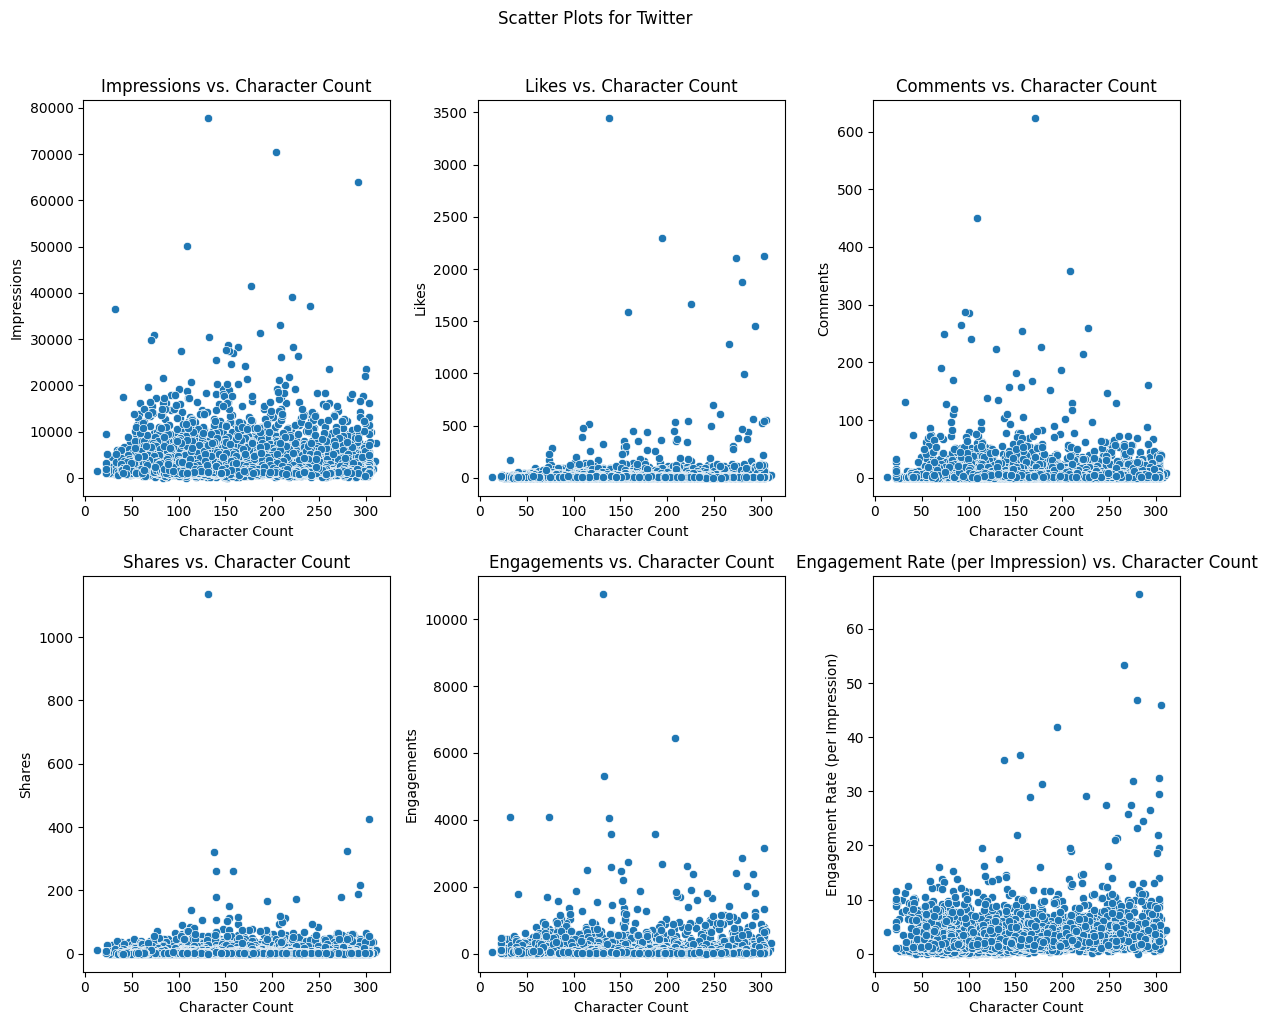

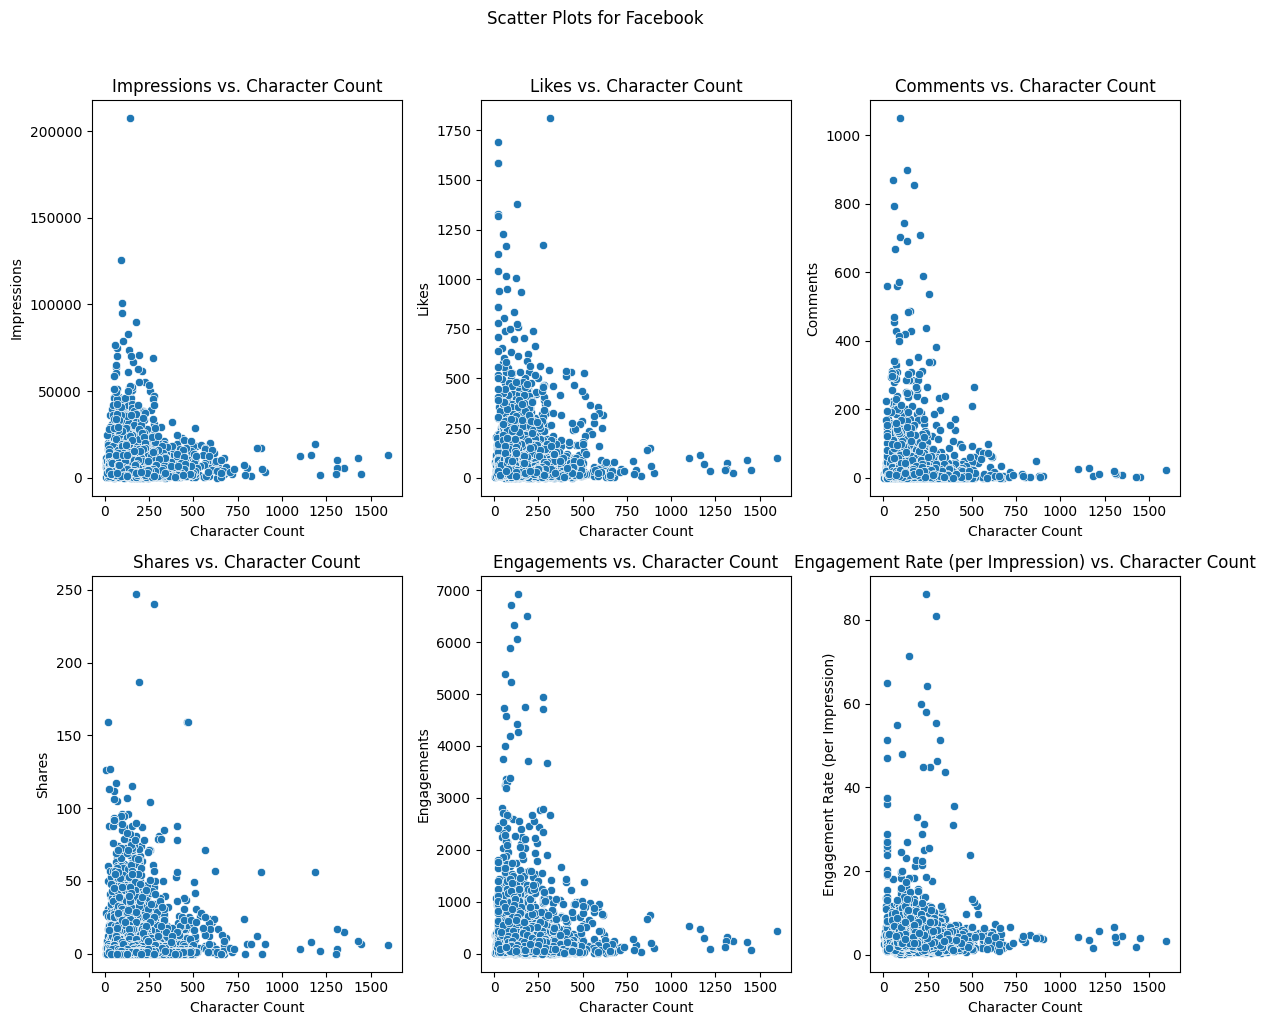

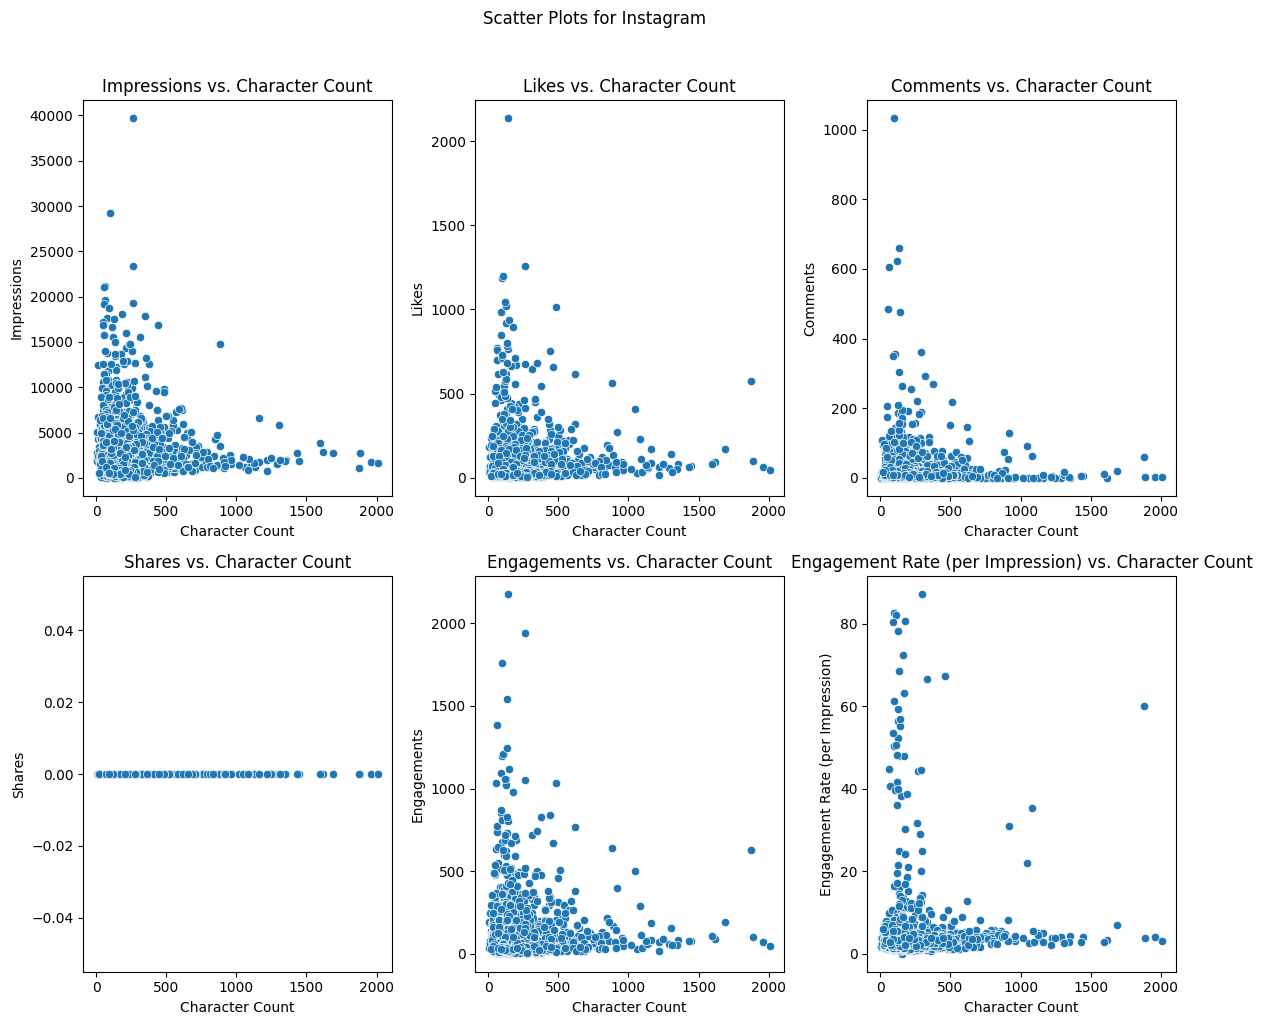

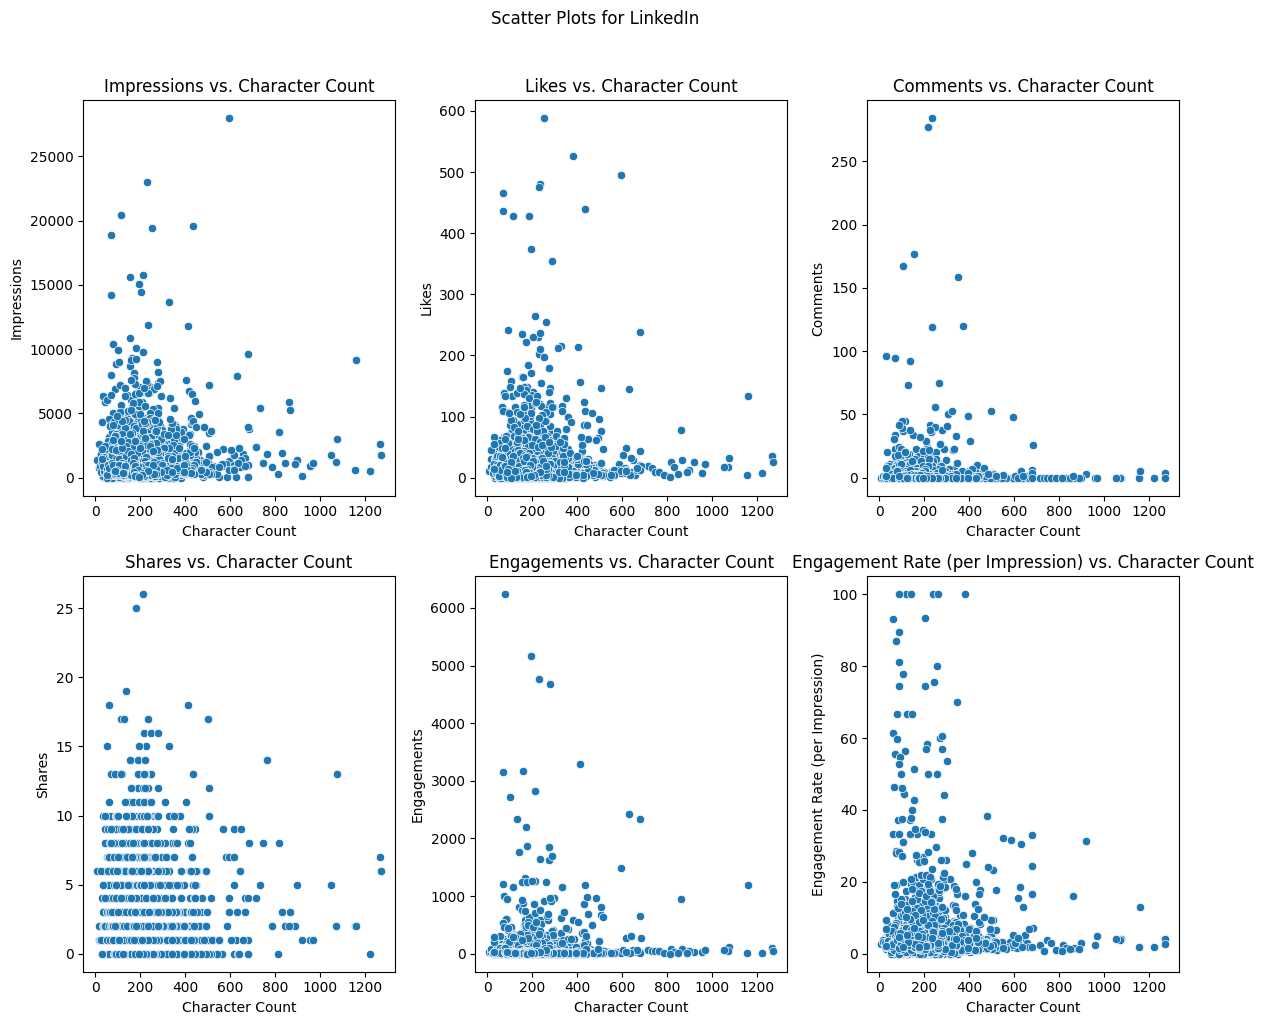

In [38]:
# Apply absolute function to all outcome variables
outcome_cols = ['Impressions', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']
post_content_final[outcome_cols] = post_content_final[outcome_cols].abs()

# Plot scatter plots for each outcome variable and network
networks = post_content_final['Network'].unique()

for network in networks:
    plt.figure(figsize=(12, 10))
    plt.suptitle(f'Scatter Plots for {network}', y=1.02)

    for i, outcome_var in enumerate(outcome_cols, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(x='char_count', y=outcome_var, data=post_content_final[post_content_final['Network'] == network])
        plt.title(f'{outcome_var} vs. Character Count')
        plt.xlabel('Character Count')
        plt.ylabel(outcome_var)

    plt.tight_layout()
    plt.show()


# Analyzing the hashtags

In [39]:
# glimpse of hashtags dataset
hashtags_final.head(3)

,Network,Engagement Rate (per Impression),extracted_hashtags,10over10,10reward4saving,10yearchallenge,17,2019,2021,2022edition,...,yls2023,youare,youarebeautiful,youaresecured,youarestrong,youcan,youthevent,zerohunger,zeromalariastartswithme,zeromalariastartswithus
0,Twitter,1.4,#MovingForwardNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Twitter,0.9,#MovingForwardNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Twitter,0.3,#MovingForwardNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# number of unique hashatags in the dataset
hashtags_final['extracted_hashtags'].nunique()

2580

In [41]:
# count of appearance for the unique hashtags using value counts
hashtags_final['extracted_hashtags'].value_counts()

extracted_hashtags
#ITCANBE                                   5775
#WealthWednesday                            711
#ItCanBe                                    506
#Reward4Saving, #ITCANBE                    305
#BestInsuranceDeals                         281
                                           ... 
#BlackFriday, #TopReads                       1
#EidAlAdha, #EidMubarak, #Eid, #ItCanBe       1
#WAPIS                                        1
#ItCanBe, #Insurance                          1
#SMWAgritechNG, #SMWLagos                     1
Name: count, Length: 2580, dtype: int64

In [42]:
# display number of unique hashtags with atleast 50 appearences 
unique_hashtags_counts = hashtags_final['extracted_hashtags'].value_counts()
multiple_occurrences = unique_hashtags_counts[unique_hashtags_counts >= 50]
display(multiple_occurrences)

extracted_hashtags
#ITCANBE                                    5775
#WealthWednesday                             711
#ItCanBe                                     506
#Reward4Saving, #ITCANBE                     305
#BestInsuranceDeals                          281
                                            ... 
#FinancialTip, #ITCANBE                       54
#MyDreamsCanBe                                54
#igniteyourfuze, #fuzefestival, #ITCANBE      52
#StanbicIBTCScholarship, #ITCANBE             50
#SMWLagos                                     50
Name: count, Length: 67, dtype: int64


It is observed that certain hashtags, often associated with slogans or catchphrases, exhibit a standard presence across a majority of posts. Due to their pervasive use, these hashtags accumulate significantly higher counts, potentially skewing the overall engagement metrics. For instance, the hashtag #ITCANBE appears a total of 5775 times, resulting in a substantial engagement score solely due to its frequent occurrence. This prevalence can distort the assessment of other hashtags' performance.

To address this, we plan to categorize hashtags into groups based on their commonality and analyze them within these groups across different networks. This approach aims to provide a more nuanced and balanced evaluation of hashtag performance, allowing us to discern specific trends and effectiveness within distinct categories. By doing so, we can mitigate the impact of frequently used hashtags on the overall analysis and obtain more accurate insights into the engagement dynamics of different hashtags across networks.

In [43]:
#group the hashtags into bins of 50 
unique_hashtags_counts = hashtags_final['extracted_hashtags'].value_counts()

# Create bins for value counts
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '200+']

# Use pd.cut() to categorize value counts into bins
count_bins = pd.cut(unique_hashtags_counts, bins=bins, labels=labels, include_lowest=True)

# Add the 'count_bin' column to the DataFrame
hashtags_with_bins = pd.DataFrame({'hashtags': unique_hashtags_counts.index,
                                   'count': unique_hashtags_counts.values, 'count_bin': count_bins})

# Sum the counts within each bin
bin_totals = hashtags_with_bins.groupby('count_bin')['count'].sum()

# Display the total counts for each bin
print(bin_totals)


count_bin
0-50       9559
51-100     2874
101-150    1215
151-200    1122
200+       8580
Name: count, dtype: int64


In [44]:
#Total number of hashtags extracted by network
hashtags_by_network = hashtags_final.groupby('Network')['extracted_hashtags'].value_counts()

# Display the total number of hashtags for each unique network
network_totals = hashtags_by_network.groupby('Network').sum()
print(network_totals)


Network
Facebook     5970
Instagram    6026
LinkedIn     5489
Twitter      5865
Name: count, dtype: int64


In [45]:
# total number of unique hashtags for each network
unique_hashtags_per_network = hashtags_final.groupby('Network')['extracted_hashtags'].nunique()

# Display the total number of unique hashtags for each unique network
unique_hashtags_per_network

Network
Facebook     1273
Instagram    1576
LinkedIn     1029
Twitter      1385
Name: extracted_hashtags, dtype: int64

We aim to gauge the effectiveness of hashtags in terms of user interaction, utilizing the Engagement Rate (per Impression) as our metric. Given that the engagement rate is a ratio typically expressed as a percentage, it is imperative that the sum of individual engagement rates for hashtags does not surpass 100%. An aggregate exceeding 100% would imply an impractical scenario where engagement exceeds the total impressions, an impossibility in real-world terms. To address this limitation and derive a comprehensive metric, we opt to calculate the average rate per impression across all hashtags in each bin. This approach offers a balanced representation of the overall effectiveness of hashtags in engaging users relative to their impressions, ensuring a more meaningful and interpretable assessmentn 

In [46]:
# Group the hashtags by network and hashtags, then count
hashtags_by_network = hashtags_final.groupby(['Network', 'extracted_hashtags']).size()

# Create bins for value counts
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '200+']

# Use pd.cut() to categorize value counts into bins
count_bins = pd.cut(hashtags_by_network, bins=bins, labels=labels, include_lowest=True)

# Add the 'count_bin' column to the DataFrame
hashtags_with_bins = pd.DataFrame({'hashtags': hashtags_by_network.index.get_level_values('extracted_hashtags'),
                                   'count': hashtags_by_network.values, 'count_bin': count_bins})

# Calculate average engagement rate per impression for each hashtag
average_engagement_rate = hashtags_final.groupby('extracted_hashtags')['Engagement Rate (per Impression)'].mean()

# Merge average engagement rate with the hashtags_with_bins DataFrame
hashtags_with_bins = hashtags_with_bins.merge(average_engagement_rate, left_on='hashtags', right_index=True)

# Total number of hashtags extracted by network and bin
hashtags_by_network_bin = hashtags_with_bins.groupby(['Network', 'count_bin']).apply(lambda x: x.nlargest(5, 'Engagement Rate (per Impression)'))

# Display the top 5 hashtags for each bin and network
dfs = []

for network in hashtags_final['Network'].unique():
    print(f"\nTop 5 Hashtags for {network}:\n")
    for count_bin in labels:
        try:
            top_5_hashtags = hashtags_by_network_bin.loc[network, count_bin].reset_index(level=[0, 1], drop=True)
            
            # Calculate the composite metric for each bin
            top_5_hashtags['Average engagement rate per hashtag'] = top_5_hashtags['Engagement Rate (per Impression)'] / top_5_hashtags['count']
            
            print(f"Bin: {count_bin}")
            display(top_5_hashtags[['hashtags', 'count', 'Engagement Rate (per Impression)', 'Average engagement rate per hashtag']])
            dfs.append(top_5_hashtags)
        except KeyError:
            print(f"No data for {network} in bin {count_bin}")



Top 5 Hashtags for Twitter:

Bin: 0-50


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#SMWLAGOS,1,28.500000,28.500000
1,"#SMWLagos, #SMWSELLAFRICA",2,24.633333,12.316667
2,"#3MinAccountChallange, #SMWLagos, #StanbicIBTC",1,22.350000,22.350000
3,"#LagosInnovates, #SMWLagos, #SMWLagosInnovates",1,20.766667,20.766667
4,"#SMWLagos, #SMWSIBTCSESSION",3,20.477778,6.825926


Bin: 51-100


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#AgainstAllOdds,53,3.856122,0.072757
1,#MotivationMonday,63,3.511111,0.055732
2,#CareerTip,60,3.243125,0.054052
3,#NeverStopInvesting,59,3.228986,0.054729
4,"#PowerUpMonday, #MondayMotivation",51,2.958065,0.058001


Bin: 101-150


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#Together4ALimb,102,4.067984,0.039882
1,#ItCanBe,110,3.122727,0.028388
2,#TopReads,133,1.181690,0.008885


Bin: 151-200


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#WealthWednesday,163,3.43052,0.021046


Bin: 200+


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#ITCANBE,1113,2.884381,0.002592



Top 5 Hashtags for Facebook:

Bin: 0-50


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,"#SMWLagos, #SMWSELLAFRICA",1,24.633333,24.633333
1,"#3MinAccountChallange, #SMWLagos, #StanbicIBTC",1,22.350000,22.350000
2,"#LagosInnovates, #SMWLagos, #SMWLagosInnovates",1,20.766667,20.766667
3,"#3MinAccountChallenge, #SMWLagos, #StanbicIBTC",1,20.333333,20.333333
4,#SBWAIC2018,9,19.514286,2.168254


Bin: 51-100


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,"#Reward4Saving, #ITCANBE",85,6.073770,0.071456
1,#Together4ALimb,70,4.067984,0.058114
2,#ThrowbackThursday,53,3.485455,0.065763
3,#NeverStopInvesting,53,3.228986,0.060924
4,#HappenToLife,78,2.695357,0.034556


Bin: 101-150


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#ItCanBe,110,3.122727,0.028388


Bin: 151-200


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#WealthWednesday,178,3.43052,0.019273


Bin: 200+


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#ITCANBE,1460,2.884381,0.001976



Top 5 Hashtags for Instagram:

Bin: 0-50


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,"#MyDreamCanBe, #stanbicibtc",1,67.40,67.400
1,"#27, #17, #5, #5, #mydreamscanbe",1,66.50,66.500
2,"#MyDreamscanbe, #childrensday",1,61.20,61.200
3,"#Repost, #lovewithstanbicibtc, #goforlove, #it...",1,60.00,60.000
4,"#mydreamscanbe, #icanbe",2,59.45,29.725


Bin: 51-100


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,"#Reward4Saving, #ITCANBE",76,6.073770,0.079918
1,"#GoForIt, #ITCANBE",71,2.641221,0.037200


Bin: 101-150


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#WealthWednesday,105,3.43052,0.032672


Bin: 151-200


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#ItCanBe,180,3.122727,0.017348


Bin: 200+


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#ITCANBE,1675,2.884381,0.001722



Top 5 Hashtags for LinkedIn:

Bin: 0-50


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,"#HappenToLife, #HappenToLife",1,100.0,100.0
1,"#smw18, #SMETips",1,70.0,70.0
2,"#WorkersDay2022, #itcanbe",1,59.7,59.7
3,#SMWLAGOS,1,28.5,28.5
4,"#PIA, #ITCANBE",1,26.2,26.2


Bin: 51-100


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,"#Reward4Saving, #ITCANBE",95,6.073770,0.063934
1,#CareerTip,51,3.243125,0.063591
2,#NeverStopInvesting,57,3.228986,0.056649
3,#HappenToLife,76,2.695357,0.035465
4,"#GoForIt, #ITCANBE",67,2.641221,0.039421


Bin: 101-150


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#ItCanBe,106,3.122727,0.02946


No data for LinkedIn in bin 151-200
Bin: 200+


,hashtags,count,Engagement Rate (per Impression),Average engagement rate per hashtag
0,#WealthWednesday,265,3.430520,0.012945
1,#ITCANBE,1527,2.884381,0.001889



Top 5 Hashtags for nan:

No data for nan in bin 0-50
No data for nan in bin 51-100
No data for nan in bin 101-150
No data for nan in bin 151-200
No data for nan in bin 200+


These insights are instrumental in shaping content strategies and guiding marketing efforts. Hashtags with higher engagement rates per impression showcase the effectiveness of specific campaign themes.

This information serves as a guide for incorporating trending and engaging hashtags into posts thereby enhancing the reach and impact of messages. Understanding the popularity and resonance of particular themes enables the company to tailor their content more effectively to audience preferences, whether the goal is to disseminate information, drive engagement, or encourage specific actions.

In summary, the analysis of hashtag campaign performance provides actionable insights for optimizing content strategies, enhancing audience engagement, and ultimately achieving marketing objectives.

While a higher engagement rate may be correlated with the presence of certain hashtags, it's important to note that correlation does not imply causation. The observed association could be a result of these hashtags being linked to content that inherently attracts more engagement. To delve deeper into this relationship, we will conduct a feature importance analysis. This analysis aims to assess the contribution of different hashtags to various performance metrics for each network. By evaluating the importance of individual features, such as hashtags, we can gain insights into their impact on engagement metrics. However, it's crucial to recognize that while this analysis can highlight associations, establishing a direct causal relationship is a more intricate task. Other factors, such as content quality, timing, and audience preferences, also play roles in determining engagement levels. Therefore, the feature importance analysis will provide valuable insights, but interpretation should be done cautiously, considering the broader context of social media engagement dynamics..

In [47]:

outcome_cols = ['Impressions', 'Likes', 'Comments', 'Shares', 'Engagements', 'Engagement Rate (per Impression)']

for network, group_data in hashtags_final.groupby('Network'):
    print(f"\nResults for {network}:\n")

    for col in outcome_cols:
        # Separate data for each iteration
        x = group_data.drop(['extracted_hashtags','Engagement Rate (per Impression)'], axis=1)
        y = post_content_final.loc[group_data.index, col].copy()

        # Handle missing values with SimpleImputer
        imputer = SimpleImputer(strategy='constant', fill_value=0)
        x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

        # One-hot encode the 'Network' column
        encoder = OneHotEncoder(sparse=False, drop='first')
        network_encoded = encoder.fit_transform(x_imputed[['Network']])
        network_encoded_df = pd.DataFrame(network_encoded, columns=encoder.get_feature_names_out(['Network']))

        # Concatenate the one-hot encoded 'Network' with the rest of the features
        x_encoded = pd.concat([x_imputed.drop(['Network'], axis=1), network_encoded_df], axis=1)

        # Fit model
        random_forest = RandomForestRegressor()
        random_forest.fit(x_encoded, y)

        # Feature importance
        feature_importance = pd.DataFrame({'feature': x_encoded.columns, 'importance': random_forest.feature_importances_}) \
            .sort_values(by='importance', ascending=False) \
            .reset_index(drop=True)

        print(f'Outcome Variable: {col}')
        display(feature_importance.head())



Results for Facebook:

Outcome Variable: Impressions


,feature,importance
0,3minaccountchallenge,0.095732
1,staysafe,0.069433
2,itcanbe,0.060142
3,powerupmonday,0.049467
4,stanbicibtc,0.032638


Outcome Variable: Likes


,feature,importance
0,yls2023,0.287062
1,itcanbe,0.063079
2,worldautismday,0.042224
3,sustainabilitysaturday,0.038344
4,seasonofcheer,0.036443


Outcome Variable: Comments


,feature,importance
0,3minaccountchallenge,0.424387
1,powerupmonday,0.050504
2,mydreamscanbe,0.042596
3,virtualt4al2022,0.032182
4,itcanbe,0.030957


Outcome Variable: Shares


,feature,importance
0,itcanbe,0.136903
1,smwlagos,0.063493
2,wealthwednesday,0.034108
3,motivationmonday,0.031779
4,sicc2018,0.028930


Outcome Variable: Engagements


,feature,importance
0,3minaccountchallenge,0.160467
1,powerupmonday,0.077982
2,yls2023,0.057657
3,itcanbe,0.054106
4,goodlife,0.040529


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,yls2023,0.327675
1,itcanbe,0.087546
2,worldautismday,0.065255
3,digitalskills4life,0.024065
4,futureme,0.023233



Results for Instagram:

Outcome Variable: Impressions


,feature,importance
0,itcanbe,0.126167
1,bluetalks,0.072599
2,investment,0.065549
3,bestinvestmentbanknigeria,0.035411
4,mtn,0.033520


Outcome Variable: Likes


,feature,importance
0,yls2023,0.211135
1,itcanbe,0.080643
2,bluetalks,0.032753
3,bestinvestmentbanknigeria,0.024061
4,trustedbroker,0.020713


Outcome Variable: Comments


,feature,importance
0,riddles,0.160113
1,financialtip,0.108150
2,itcanbe,0.087731
3,gobloom,0.050493
4,reward4saving2,0.044050


Outcome Variable: Shares


,feature,importance
0,10over10,0.0
1,sailing,0.0
2,savemore,0.0
3,savemoney,0.0
4,save,0.0


Outcome Variable: Engagements


,feature,importance
0,yls2023,0.219654
1,itcanbe,0.078598
2,riddles,0.047007
3,financialtip,0.033541
4,seasonofcheer,0.026846


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,yls2023,0.571127
1,itcanbe,0.094509
2,trustedbroker,0.068668
3,invest,0.038275
4,blueblossom,0.032869



Results for LinkedIn:

Outcome Variable: Impressions


,feature,importance
0,itcanbe,0.103844
1,afticachinaexpotrade,0.093124
2,plusrewardloyaltypromo,0.064745
3,childrensright,0.045808
4,sdg,0.035587


Outcome Variable: Likes


,feature,importance
0,afticachinaexpotrade,0.140026
1,plusrewardloyaltypromo,0.112358
2,trade,0.110861
3,itcanbe,0.081159
4,goforit,0.067147


Outcome Variable: Comments


,feature,importance
0,internationaldayofboychild,0.232127
1,stanbicibtcwomenintech,0.092065
2,digitalskills4life,0.073938
3,movingforward,0.071443
4,trustedbroker,0.067749


Outcome Variable: Shares


,feature,importance
0,itcanbe,0.097756
1,movingforward,0.047001
2,wealthwednesday,0.045805
3,happentolife,0.027711
4,bestinsurancedeals,0.026266


Outcome Variable: Engagements


,feature,importance
0,goforextraordinaryfuture,0.274322
1,mutualfunds,0.102144
2,nigeriaat62,0.065878
3,itcanbe,0.047437
4,customerserviceweek,0.046498


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,internationaldayofcharity,0.139223
1,topread,0.103654
2,hifl2018,0.087251
3,timeisnow,0.081956
4,leavealegacee,0.081503



Results for Twitter:

Outcome Variable: Impressions


,feature,importance
0,childrensday2019,0.116684
1,sdg5,0.046163
2,itcanbe,0.043843
3,genderequality,0.040629
4,bestbrokeragehousenigeria,0.034548


Outcome Variable: Likes


,feature,importance
0,movingforward,0.213062
1,together4alimb,0.186478
2,worldcancerday2021,0.103493
3,thoughtsontuesday,0.063664
4,africaday,0.047603


Outcome Variable: Comments


,feature,importance
0,childrensday2019,0.327358
1,bestbrokeragehousenigeria,0.091758
2,smwlagos,0.048127
3,itcanbe,0.027063
4,moneymonday,0.027007


Outcome Variable: Shares


,feature,importance
0,movingforward,0.120865
1,together4alimb,0.112712
2,nsecorporatechallenge,0.084820
3,itcanbe,0.062022
4,thoughts,0.023838


Outcome Variable: Engagements


,feature,importance
0,bls2015,0.202067
1,bestbrokeragehousenigeria,0.097990
2,nsecorporatechallenge,0.059559
3,together4alimb,0.053888
4,movingforward,0.038623


Outcome Variable: Engagement Rate (per Impression)


,feature,importance
0,africaday,0.063814
1,beatplasticpollution,0.053114
2,itcanbe,0.043310
3,mothersday,0.042205
4,together4alimb,0.032014


### Facebook:
1. **Impressions:**
   - Top hashtags: 3minaccountchallenge, staysafe, itcanbe

2. **Likes:**
   - Top hashtags: yls2023, itcanbe, worldautismday

3. **Comments:**
   - Top hashtags: 3minaccountchallenge, powerupmonday, mydreamscanbe

4. **Shares:**
   - Top hashtags: itcanbe, smwlagos, wealthwednesday

5. **Engagements:**
   - Top hashtags: 3minaccountchallenge, powerupmonday, yls2023

6. **Engagement Rate (per Impression):**
   - Top hashtags: yls2023, itcanbe, worldautismday

### Instagram:
1. **Impressions:**
   - Top hashtags: itcanbe, investment, bluetalks

2. **Likes:**
   - Top hashtags: yls2023, itcanbe, bluetalks

3. **Comments:**
   - Top hashtags: riddles, financialtip, itcanbe

4. **Shares:**
   - No significant importance for any hashtag.

5. **Engagements:**
   - Top hashtags: yls2023, itcanbe, riddles

6. **Engagement Rate (per Impression):**
   - Top hashtags: yls2023, itcanbe, trustedbroker

### LinkedIn:
1. **Impressions:**
   - Top hashtags: afticachinaexpotrade, itcanbe, plusrewardloyaltypromo

2. **Likes:**
   - Top hashtags: afticachinaexpotrade, itcanbe, trade

3. **Comments:**
   - Top hashtags: internationaldayofboychild, movingforward, digitalskills4life

4. **Shares:**
   - Top hashtags: itcanbe, wealthwednesday, movingforward

5. **Engagements:**
   - Top hashtags: goforextraordinaryfuture, mutualfunds, nigeriaat62

6. **Engagement Rate (per Impression):**
   - Top hashtags: internationaldayofcharity, topread, hifl2018

### Twitter:
1. **Impressions:**
   - Top hashtags: childrensday2019, genderequality, itcanbe

2. **Likes:**
   - Top hashtags: together4alimb, movingforward, worldcancerday2021

3. **Comments:**
   - Top hashtags: childrensday2019, bestbrokeragehousenigeria, smwlagos

4. **Shares:**
   - Top hashtags: movingforward, together4alimb, nsecorporatechallenge

5. **Engagements:**
   - Top hashtags: bls2015, bestbrokeragehousenigeria, nsecorporatechallenge

6. **Engagement Rate (per Impression):**
   - Top hashtags: africaday, beatplasticpollution, mothersday

**Note:** The term "Top hashtags" refers to the hashtags with the highest feature importance for each outcome variable on the respective platform. may vary. It's essential to continuously analyze and adapt your strategy based on real-time data and feedback.